In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from pygam import LinearGAM, s, f
import random
random_seed = 42
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=";")
# Step 2: Train a Model
X = data.drop("quality", axis=1)
y = data["quality"]
# y = data['quality'].apply(lambda x: 1 if x >= 7 else 0)  # 2 class: >=7 high quality <7 low quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=random_seed)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from pygam import LinearGAM, s, f
import numpy as np
import re
from matplotlib.collections import LineCollection
import random
random_seed = 42
import matplotlib.pyplot as plt
np.random.seed(random_seed)
random.seed(random_seed)

def get_model():
    np.random.seed(random_seed)
    random.seed(random_seed)
    # Step 1: Load the Dataset
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    data = pd.read_csv(url, delimiter=";")

    # Step 2: Train a Model
    X = data.drop("quality", axis=1)
    y = data["quality"]
    # y = data['quality'].apply(lambda x: 1 if x >= 7 else 0)  # 2 class: >=7 high quality <7 low quality
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=random_seed)
    model.fit(X_train, y_train)
    y_test = np.array(y_test)
    pred = model.predict(X_train)
    y_train= np.array(y_train)
    
    k = 0
    n=0
    for i in range(len(pred)):
        if abs(pred[i] - y_train[i])<0.2:
            k+=1
            if y_train[i]==1:
                # print(i)
                n+=1
    print('acc:',k/len(pred))
    print('high quality:',n/len(pred))
    return model, X_train, y_train,X,y

In [3]:
model, X_train, y_train,X,y = get_model()

acc: 0.7075840500390931
high quality: 0.0


In [6]:
import numpy as np
import lime.lime_tabular

# Create the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=['quality'],
    mode='regression'
)

# Select an instance to explain
instance = X_test.iloc[0]

# Explain the instance
explanation = explainer.explain_instance(
    data_row=instance,
    predict_fn=model.predict
)

/mnt/ssd2/yifan/miniconda3/envs/llama/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/mnt/ssd2/yifan/miniconda3/envs/llama/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/mnt/ssd2/yifan/miniconda3/envs/llama/lib/python3.12/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labe

/tmp/ipykernel_2146995/2365722346.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


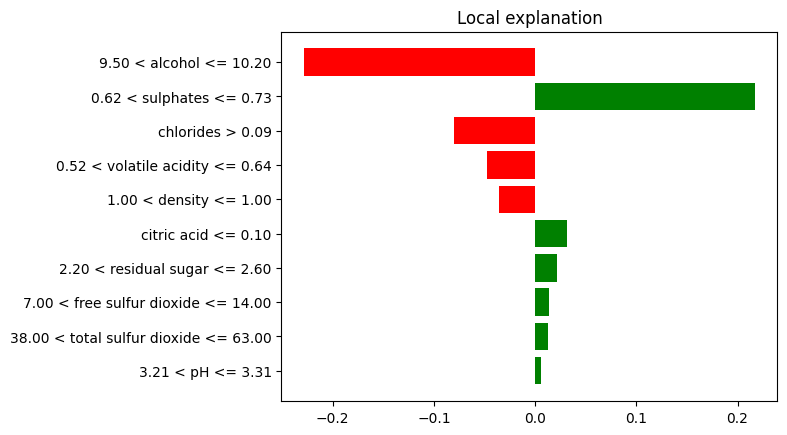

In [17]:
from IPython.core.display import display, HTML
display(HTML('<style>.lime-table { background-color: white !important; }</style>'))
explanation.show_in_notebook(show_table=True, show_all=False)
# fig =  explanation.show_in_notebook(show_table=True, show_all=False)
# explanation.as_pyplot_figure()
# fig.patch.set_facecolor('white')  
plt.show()

# 生成解释图像
fig = explanation.as_pyplot_figure()

# 保存图像并设置背景透明
fig.savefig('lime_explanation.png', transparent=True)



In [3]:
len(X_train)

1279

In [4]:


model, X_train, y_train,X,y = get_model()

acc: 0.7075840500390931
high quality: 0.0


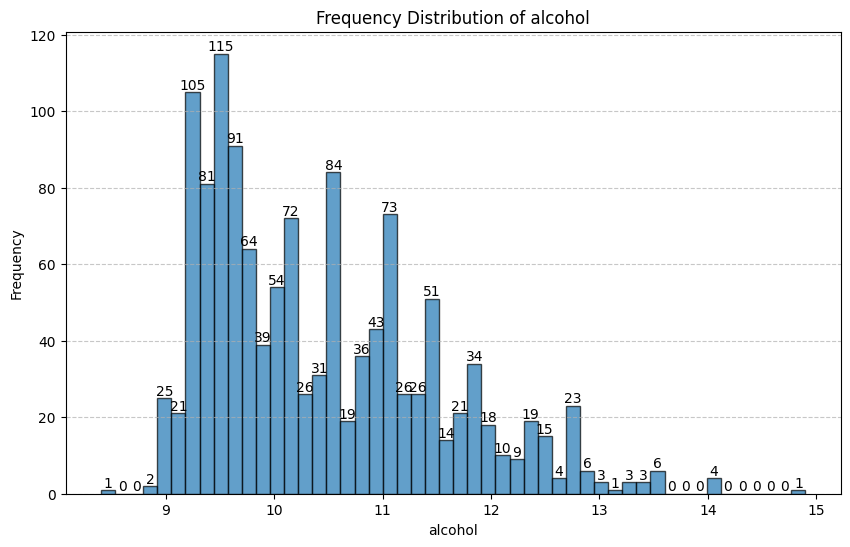

In [26]:
# Plot frequency histogram for 'citric acid'
name='alcohol'
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(X_train[name], bins=50, edgecolor='k', alpha=0.7)
# plt.hist(X_train[name], bins=10, edgecolor='k', alpha=0.7)
plt.title('Frequency Distribution of ' + name)
plt.xlabel(name)
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Adding the numbers on top of the bars
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count, int(count), 
             ha='center', va='bottom', fontsize=10)
plt.show()

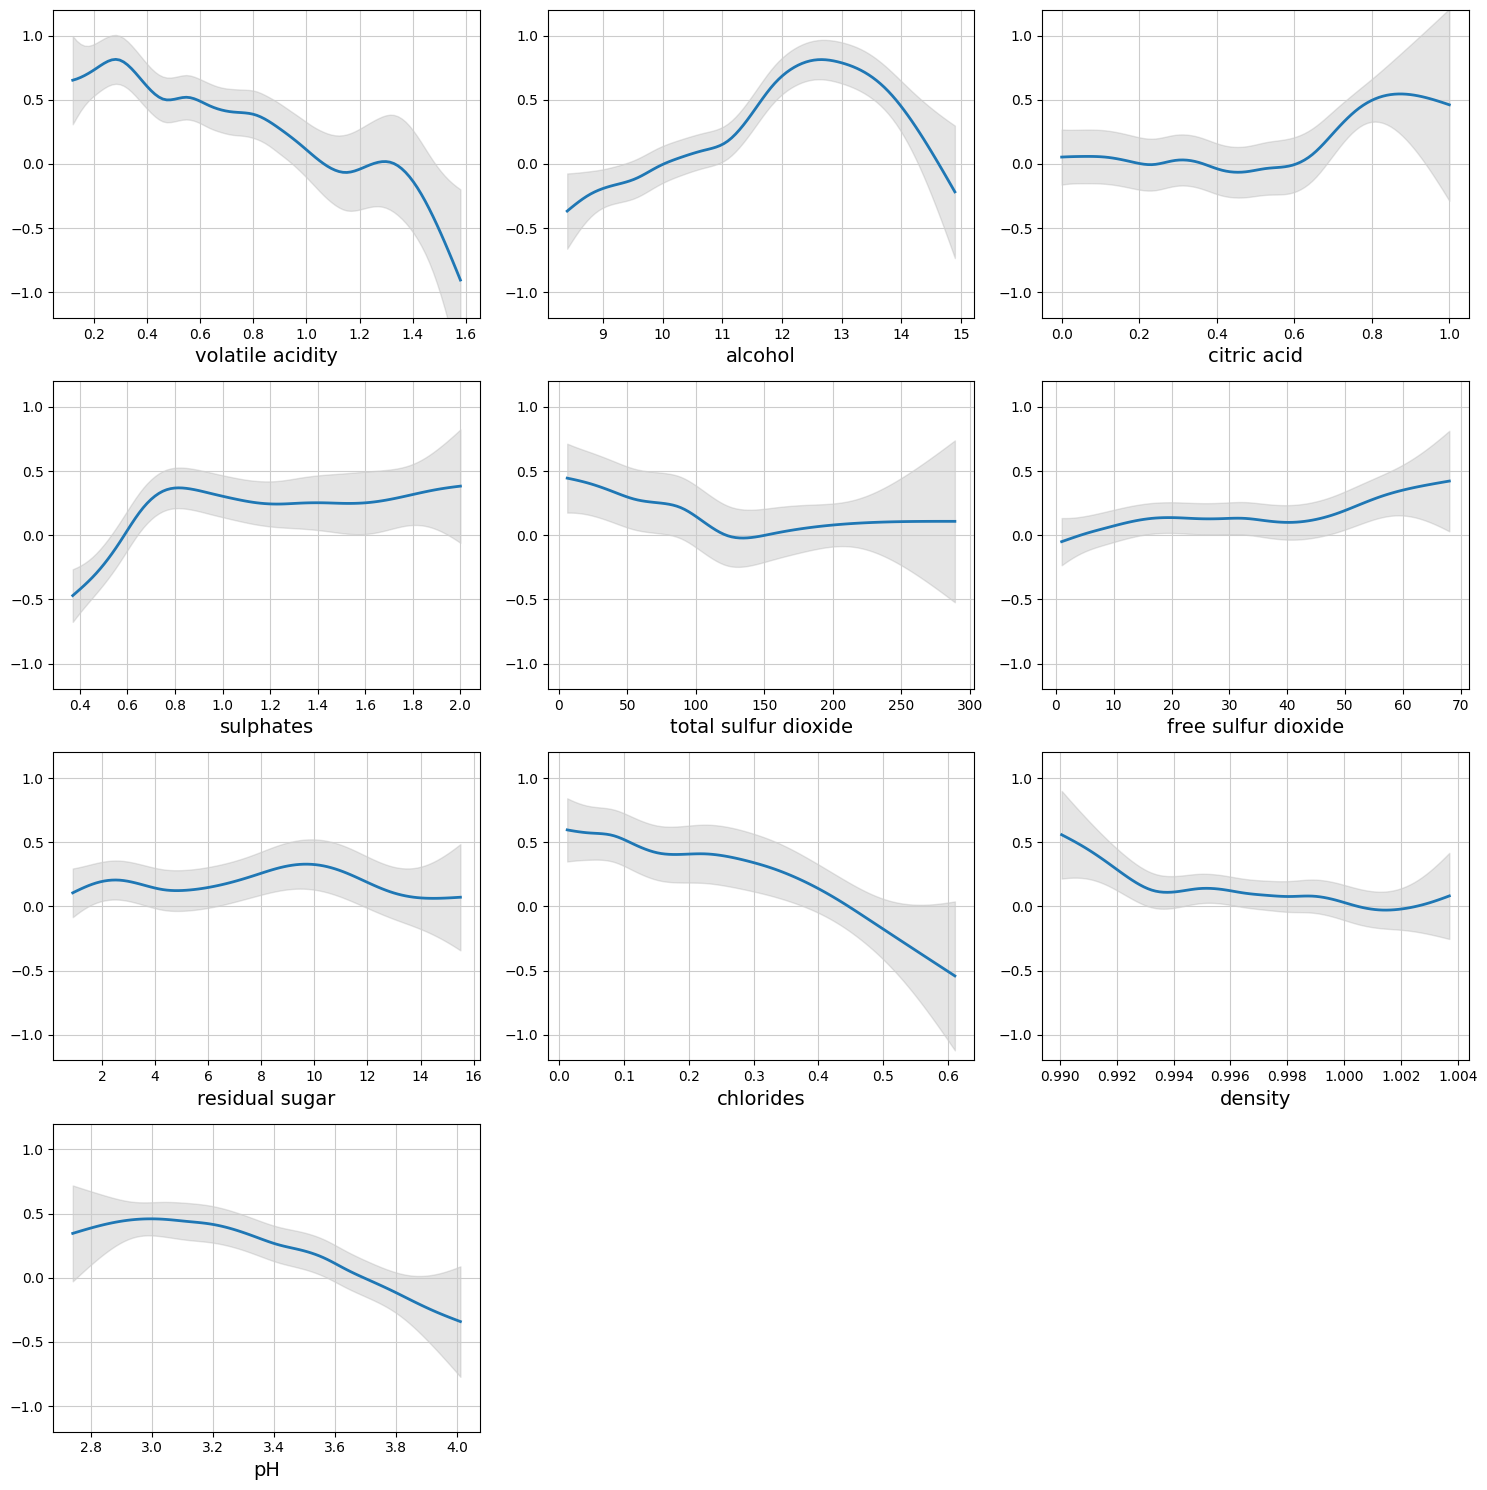

In [16]:
# Step 4: Apply GAM
# Step 4: Apply GAM
np.random.seed(random_seed)
random.seed(random_seed)
filtered_X_train = X_train
# Filter out out-of-boundary samples
# filtered_X_train = X_train[
#     (X_train['volatile acidity'] <= 1.2) &
#     (X_train['citric acid'] <= 0.8) &
#     (X_train['free sulfur dioxide'] <= 60) &
#     (X_train['total sulfur dioxide'] <= 150) &
#     (X_train['sulphates'] <= 1.2) &
#     (X_train['alcohol'] <= 14.5) &
#     (X_train['alcohol'] >= 8.5)
# ]
prediction = model.predict(filtered_X_train)
# gam = LinearGAM( s(1) + s(2) + s(5) + s(6) + s(9) + s(10)).fit(X_train, prediction)

gam = LinearGAM(
    s(1, lam=1) +  # Adjust lambda for term 1
    s(10, lam=10) +   # Adjust lambda for term 10
    s(2, lam=10) +  # Adjust lambda for term 2
    s(9, lam=10)+   # Adjust lambda for term 9
    s(6, lam=20) +  # Adjust lambda for term 6
    s(5, lam=20) +   # Adjust lambda for term 5
    s(3, lam=20) +   # Adjust lambda for term 5
    s(4, lam=20) +   # Adjust lambda for term 5
    s(7, lam=20) +  # Adjust lambda for term 5
    s(8, lam=20)    # Adjust lambda for term 5
).fit(filtered_X_train, prediction)
xxs = []
# Dictionary to store the magnitude of change and shape information
feature_analysis = {}
# Plot GAM
plt.figure(figsize=(15, 15))
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    plt.subplot(4, 3, i+1)
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    xxs.append(XX)
    plt.plot(XX[:, term.feature], pdep, linewidth=2, label='Partial Dependence')
    plt.fill_between(XX[:, term.feature], confi[:, 0], confi[:, 1], color='grey', alpha=0.2, label='95% Confidence Interval')
    # plt.title(data.columns[term.feature], fontsize=18)
    plt.xlabel(data.columns[term.feature], fontsize=14)
    plt.grid(color='#ccc')
    # plt.legend()
    # if X_train.columns[term.feature] == 'volatile acidity':
    #     plt.xlim(right=1.2)  # Set the max limit of x-axis to 1.2
    # if X_train.columns[term.feature] == 'citric acid':
    #     plt.xlim(right=0.8)  # Set the max limit of x-axis to 1.2
    # if X_train.columns[term.feature] == 'free sulfur dioxide':
    #     plt.xlim(right=60)  # Set the max limit of x-axis to 1.2
    # if X_train.columns[term.feature] == 'total sulfur dioxide':
    #     plt.xlim(right=150)  # Set the max limit of x-axis to 1.2
    # if X_train.columns[term.feature] == 'sulphates':
    #     plt.xlim(right=1.2)  # Set the max limit of x-axis to 1.2
    # if X_train.columns[term.feature] == 'alcohol':
    #     plt.xlim(right=14.2)  # Set the max limit of x-axis to 1.2
    #     plt.xlim(left=8.5)  # Set the max limit of x-axis to 1.2
    
    plt.ylim(top=1.2)
    plt.ylim(bottom=-1.2)

        
        

    
    # Calculate magnitude of change
    magnitude_of_change = np.ptp(pdep)  # Peak to peak (max - min)

    # Shape of the plot (identify patterns)
    slopes = np.diff(pdep)
    steep_slopes = np.any(np.abs(slopes) > np.mean(np.abs(slopes)) * 2)  # Identify if there are any steep slopes
    peaks_troughs = len(np.where(np.diff(np.sign(slopes)))[0])  # Number of peaks and troughs

    # Store information in the dictionary
    feature_analysis[data.columns[term.feature]] = {
        'magnitude_of_change': magnitude_of_change,
        'steep_slopes': steep_slopes,
        'peaks_troughs': peaks_troughs
    }
plt.tight_layout()
plt.show()

In [25]:
predicted_qualities = gam.predict(X_train)

# Calculate the average of these predictions
average_predicted_quality = np.mean(predicted_qualities)

print("Average Predicted Quality (Baseline Quality):", average_predicted_quality)

Average Predicted Quality (Baseline Quality): 5.62770914772002


In [22]:
import numpy as np
from sklearn.inspection import plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Example data (assumed to be already defined)
# X_train, y_train, and model as before

# Plot PDPs for top features
top_features = ['citric acid', 'alcohol', 'volatile acidity']
plot_partial_dependence(model, X_train, top_features, grid_resolution=50)

plt.suptitle('Partial Dependence Plots for Top Features')
plt.show()


ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (/mnt/ssd2/yifan/miniconda3/envs/llama/lib/python3.12/site-packages/sklearn/inspection/__init__.py)

In [23]:
# Predict the quality for all instances in X_train
predicted_qualities = gam.predict(X_train)

# Calculate the average of these predictions
average_predicted_quality = np.mean(predicted_qualities)

print("Average Predicted Quality for X_train:", average_predicted_quality)

Average Predicted Quality for X_train: 5.62770914772002


NameError: name 'plot_partial_dependence' is not defined

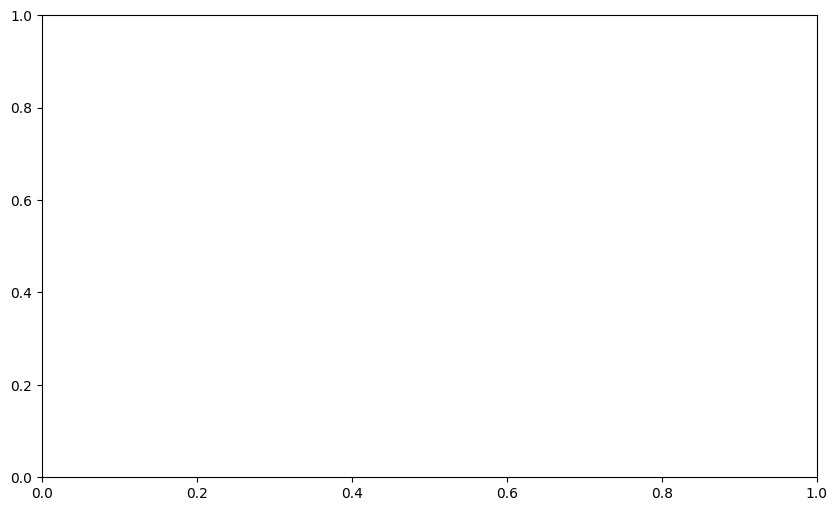

In [21]:
from sklearn.inspection import partial_dependence

features = [('alcohol', 'citric acid')]
fig, ax = plt.subplots(figsize=(10, 6))
plot_partial_dependence(model, X_train, features, grid_resolution=50, ax=ax)
plt.suptitle('2D Partial Dependence Plot for Alcohol and Citric Acid')
plt.show()

In [17]:
feature_analysis

{'volatile acidity': {'magnitude_of_change': 2.072465201390172,
  'steep_slopes': True,
  'peaks_troughs': 8},
 'citric acid': {'magnitude_of_change': 1.4517300298056222,
  'steep_slopes': True,
  'peaks_troughs': 9},
 'free sulfur dioxide': {'magnitude_of_change': 0.3259531050657221,
  'steep_slopes': True,
  'peaks_troughs': 2},
 'total sulfur dioxide': {'magnitude_of_change': 0.4745357090706286,
  'steep_slopes': True,
  'peaks_troughs': 4},
 'sulphates': {'magnitude_of_change': 0.8165317422301714,
  'steep_slopes': True,
  'peaks_troughs': 2},
 'alcohol': {'magnitude_of_change': 1.673693442575669,
  'steep_slopes': True,
  'peaks_troughs': 7}}

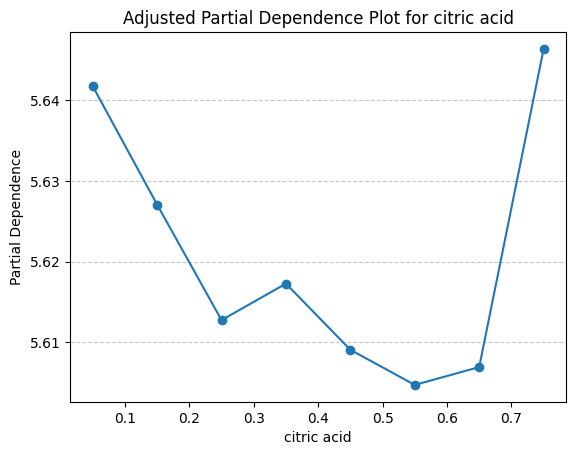

In [19]:
# Define threshold for low-frequency bins
threshold = 1

# Get histogram data
hist, bin_edges = np.histogram(X_train['citric acid'], bins=10)

# Identify low-frequency bins
low_freq_bins_indices = np.where(hist < threshold)[0]

# Combine low-frequency bins with adjacent bins
new_bins = []
for idx in range(len(bin_edges) - 1):
    if idx in low_freq_bins_indices:
        # Combine with next bin if it's not the last one, else with the previous one
        if idx < len(bin_edges) - 2:
            new_bins.append((bin_edges[idx], bin_edges[idx + 2]))
        else:
            new_bins.append((bin_edges[idx - 1], bin_edges[idx + 1]))
    else:
        new_bins.append((bin_edges[idx], bin_edges[idx + 1]))

# Remove duplicate bin ranges
new_bins = list(set(new_bins))
new_bins.sort()

# Custom function to plot PDP with adjusted bins
def custom_plot_pdp(model, X, feature, bins):
    pdp_values = []
    bin_centers = []
    for bin_start, bin_end in bins:
        mask = (X[feature] >= bin_start) & (X[feature] < bin_end)
        if mask.sum() > 0:
            bin_center = (bin_start + bin_end) / 2
            bin_centers.append(bin_center)
            X_temp = X.copy()
            X_temp[feature] = bin_center
            pdp_value = model.predict(X_temp).mean()
            pdp_values.append(pdp_value)
    plt.plot(bin_centers, pdp_values, marker='o')
    plt.title(f'Adjusted Partial Dependence Plot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Partial Dependence')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot adjusted PDP for 'citric acid'
custom_plot_pdp(model, X_train, 'citric acid', new_bins)

In [17]:
feature_names = [
    'Crime Rate', '%Residential in Area', '% Business in Area',
    '','Air Pollution', '# Rooms in House', '%Pre-1940 Units',
    'Dist. to Business District', 'Highway Accessibility', 'Property Tax Rate', 'Student-Teacher Ratio',
    'B', '%\Lower Income in Area'
]

<>:5: SyntaxWarning: invalid escape sequence '\L'
<>:5: SyntaxWarning: invalid escape sequence '\L'
/tmp/ipykernel_2067638/4023723943.py:5: SyntaxWarning: invalid escape sequence '\L'
  'B', '%\Lower Income in Area'


In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))
a = plot_tree(model, 
              feature_names=feature_names, 
              class_names=y, 
              filled=True, 
              rounded=True, 
              fontsize=14,
              max_depth=3)

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got RandomForestRegressor(random_state=42) instead.

<Figure size 2500x1000 with 0 Axes>

10


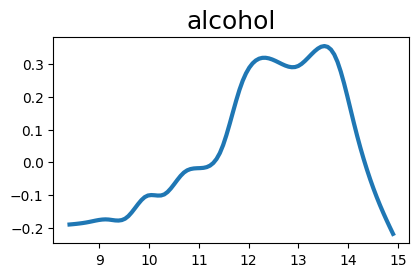

In [22]:
# Step 4: Apply GAM
# Step 4: Apply GAM

prediction = model.predict(X_train)
gam = LinearGAM( s(10)).fit(X_train, prediction)

xxs = []
# Plot GAM
plt.figure(figsize=(8, 10))
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    plt.subplot(4, 2, i+1)
    XX = gam.generate_X_grid(term=i)
    xxs.append(XX)
    plt.plot(XX[:, term.feature], gam.partial_dependence(term=i, X=XX),linewidth=3)
    print(term.feature)
    plt.title(data.columns[term.feature],fontsize=18)
plt.tight_layout()
plt.show()

In [9]:
# 选择一个实例进行解释
instance_idx = 0
instance = X_train.iloc[instance_idx]

# 使用GAM模型进行预测
predicted_value = gam.predict(instance.values.reshape(1, -1))[0]

# 指定要展示的特征
selected_features = [ 'volatile acidity', 'citric acid','free sulfur dioxide','total sulfur dioxide','sulphates', 'alcohol']
selected_feature_indices = [X.columns.get_loc(feature) for feature in selected_features]

# 计算每个特征的贡献
contributions = np.array([gam.partial_dependence(term=i, X=instance.values.reshape(1, -1)) for i in selected_feature_indices])

ValueError: cannot create grid for intercept term

In [10]:
selected_feature_indices

[1, 2, 5, 6, 9, 10]

In [12]:
import matplotlib.pyplot as plt
import numpy as np
# gam = LinearGAM( s(1) + s(2)  + s(6) + s(9) + s(10)).fit(X_train, y_train)
# Train a GAM model
prediction = model.predict(X_train)

gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10)).fit(X_train, prediction)

def plot_gam_contributions(gam, instance, contributions,selected_features, selected_feature_indices):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
    axes = axes.flatten()
    
    for idx, (feature, feature_idx) in enumerate(zip(selected_features, selected_feature_indices)):
        i=feature_idx
        ax = axes[idx]
        XX = gam.generate_X_grid(term=i)
        pdep, confi = gam.partial_dependence(term=i, width=0.9)
        
        
   
        ax.plot(XX[:, i], pdep)
        ax.fill_between(XX[:, i], confi[:, 0], confi[:, 1], alpha=0.1)
        
        # Highlight the instance's specific value on the shape function
        # 高亮实例的特定值在形状函数图上的位置
       
        
        ax.set_title(f'{feature}',fontsize=16)
    
    plt.tight_layout()
    plt.show()

# Plot the contributions
plot_gam_contributions(gam, instance, contributions,selected_features, selected_feature_indices)


NameError: name 'contributions' is not defined

/tmp/ipykernel_1780481/2958435292.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axvline(instance[feature_idx], color=color, linestyle='-')
/tmp/ipykernel_1780481/2958435292.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.scatter(instance[feature_idx], contributions[idx][0], color=color)


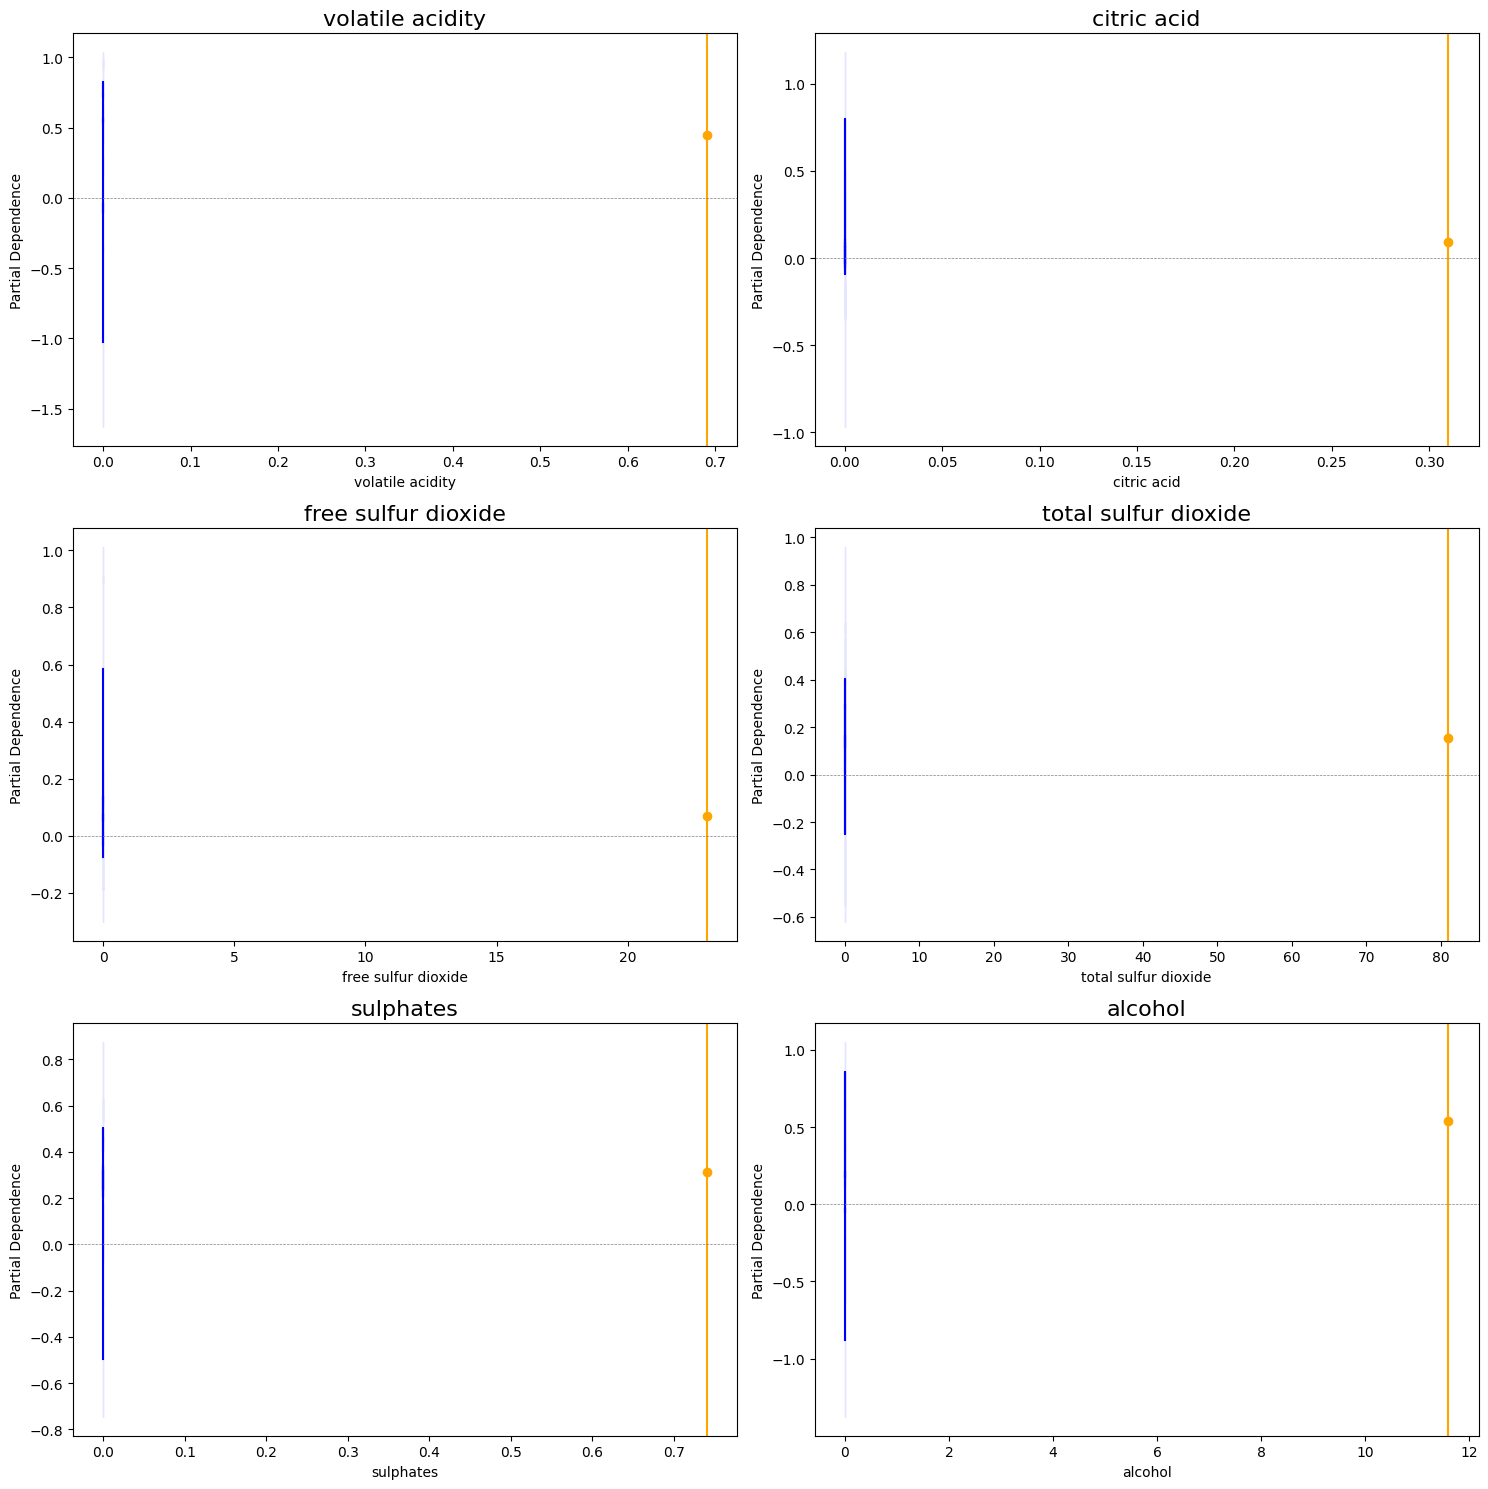

In [64]:
import matplotlib.pyplot as plt

def plot_gam_contributions(gam, instance, contributions, selected_features, selected_feature_indices):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
    axes = axes.flatten()
    
    for idx, (feature, feature_idx) in enumerate(zip(selected_features, selected_feature_indices)):
        ax = axes[idx]
        XX = gam.generate_X_grid(term=feature_idx)
        pdep, confi = gam.partial_dependence(term=feature_idx, width=0.9)
        
        # 绘制形状函数和置信区间
        ax.plot(XX[:, 0], pdep, color='blue')
        ax.fill_between(XX[:, 0], confi[:, 0], confi[:, 1], alpha=0.1, color='blue')
        
        # 高亮实例的特定值在形状函数图上的位置
        color = 'orange' if contributions[idx][0] >= 0 else 'green'
        ax.axvline(instance[feature_idx], color=color, linestyle='-')
        ax.scatter(instance[feature_idx], contributions[idx][0], color=color)
        
        # 添加0的水平分界线
        ax.axhline(y=0, color='grey', linestyle='--', linewidth=0.5)
        
        ax.set_title(f'{feature}', fontsize=16)
        ax.set_xlabel(feature)
        ax.set_ylabel('Partial Dependence')
    
    plt.tight_layout()
    plt.show()

# 绘制特定特征的贡献
plot_gam_contributions(gam, instance, contributions, selected_features, selected_feature_indices)


In [8]:
xxs[1].shape

(100, 11)